In [1]:
# Tratamiento de datos
#=======================
import pandas as pd
import numpy as np

# Gráficos
#=======================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
#=======================
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import ttest_ind

# Colores
#===============
from colorama import Fore




In [2]:
# Cargar datos del csv
df= pd.read_excel("regression/regression_data.xls")


In [3]:
# Vamos a estudiar la relación que existe entre variables, es  decir de que tipo son.
# Y observaremos que son númericas por tanto, no hay ningún problema con las categóricas
print(Fore.GREEN+"Vamos a ver los tipos de datos")
display(df.dtypes)


Vamos a ver los tipos de datos


id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

<AxesSubplot:>

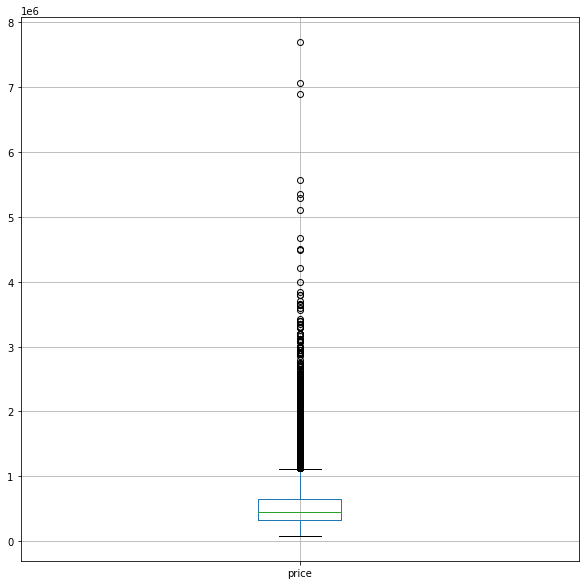

In [4]:
# El primer paso antes de generar un modelo de regresión simple es representar los datos.
# Vamos a graficarlos en una gráfica de  caja que es donde podemos observar mejor los  valores
# atítipicos.

df.boxplot(column=['price'],figsize=(10,10))


In [5]:
# Quitar los outliers, es decir el dato o los datos que se salen de la relación lineal de un conjunto de datos.
df = df[df['price'] < 1000000]


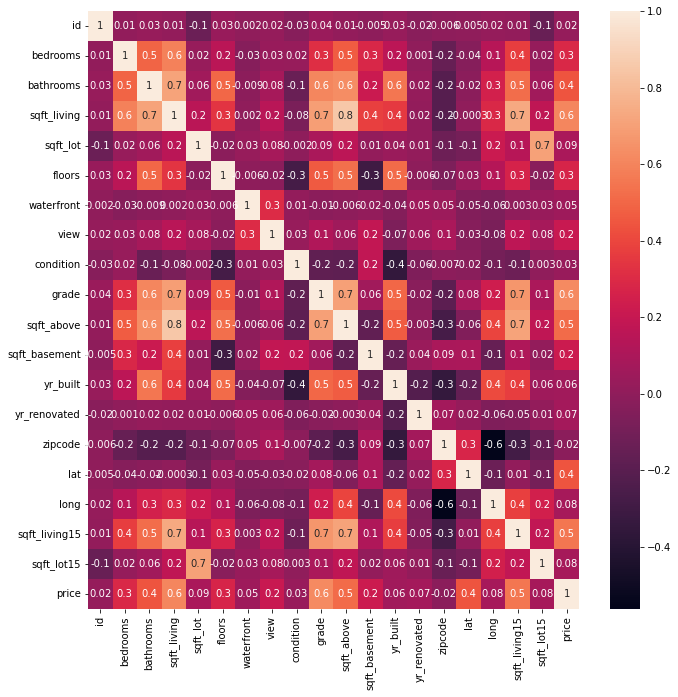

In [6]:
# Mostramos el heatmap matriz de correlación 
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt='.1g')
plt.show()

In [7]:
print(Fore.GREEN+"Vamos a ver las  correlaciones y posteriormente seleccionaremos los mas  fuertes:"+Fore.WHITE)
df.corr()['price'].sort_values()



Vamos a ver las  correlaciones y posteriormente seleccionaremos losmas  fuertes


zipcode         -0.019236
id               0.018191
condition        0.030952
waterfront       0.051174
yr_built         0.060951
yr_renovated     0.074982
long             0.079603
sqft_lot15       0.082985
sqft_lot         0.094958
view             0.212284
sqft_basement    0.221783
floors           0.269241
bedrooms         0.287381
bathrooms        0.439785
lat              0.440609
sqft_above       0.515645
sqft_living15    0.549322
sqft_living      0.604317
grade            0.617135
price            1.000000
Name: price, dtype: float64

Comprobamos  que se han eliminado correctamente


,date,sqft_living,grade,sqft_above,sqft_living15,price
0,2014-10-13,1180,7,1180,1340,221900
1,2014-12-09,2570,7,2170,1690,538000
2,2015-02-25,770,6,770,2720,180000
3,2014-12-09,1960,7,1050,1360,604000
4,2015-02-18,1680,8,1680,1800,510000
...,...,...,...,...,...,...
21592,2014-05-21,1530,8,1530,1530,360000
21593,2015-02-23,2310,8,2310,1830,400000
21594,2014-06-23,1020,7,1020,1020,402101
21595,2015-01-16,1600,8,1600,1410,400000


Matriz de correlación: 


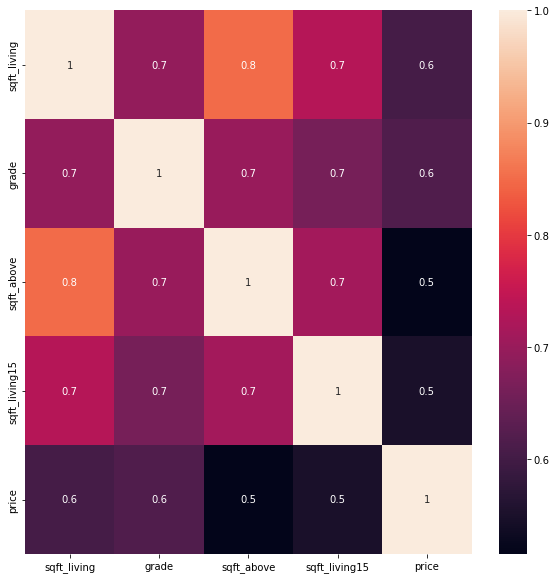

In [8]:
# Selección de pares de correlación fuerte, es decir, magnitud superior a 0,5.
# Por lo tantoo, a elegimos las características fuertemente relacionadas, filtrando aquellos 
# pares de características cuyos valores de coeficiente de correlación sean mayores que 0,5.
# Vamos a eliminar los menores.

df.drop(df.corr()['price'].sort_values(ascending=False)[df.corr()['price'].sort_values(ascending=False) < 0.5].index, axis=1, inplace=True)

# Observamos que ya solo quedan  5 columnas
print(Fore.GREEN+"Comprobamos  que se han eliminado correctamente"+Fore.BLACK)
display(df)
# Mostramos el heatmap matriz de correlación
print(Fore.GREEN+"Matriz de correlación: "+Fore.WHITE)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt='.1g')
plt.show()

Error cuadrático medio:  23168078606.03491
Coeficientes:  [119504.89311235]
Coeficientes de determinación:  0.3811189095964356


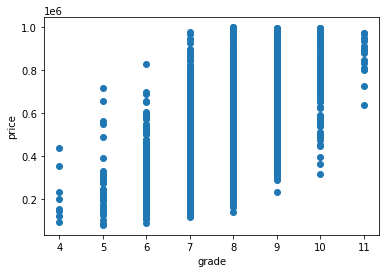

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     9878.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:08:54   Log-Likelihood:            -2.1498e+05
No. Observations:               16085   AIC:                         4.300e+05
Df Residuals:                   16083   BIC:                         4.300e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.28e+05   9103.643    -47.011      0.0

In [9]:
#A continuacion se observa la relación lineal entre las variables independientes con respecto 
# al precio, de tal forma que es posible estimar visualmente la relación que tienen.

# modelo de regresion lineal de grade con price

# División de los datos en train y test

X = df[['grade']]   
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# calcular el R2
model.score(X_test, y_test)

# calcular el MSE
y_pred = model.predict(X_test)
print(Fore.GREEN+'Error cuadrático medio: '+Fore.BLACK,mean_squared_error(y_test, y_pred))
# Coeficientes
print(Fore.GREEN+'Coeficientes: '+Fore.BLACK, model.coef_)

# Coeficiente de determinacion
print(Fore.GREEN+'Coeficientes de determinación: '+Fore.BLACK, model.score(X_test, y_test))

# Graficar
plt.scatter(X_test, y_test)
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

# Resumen
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Error cuadrático medio:  23528820215.837147
Coeficientes:  [155.8663942]
Coeficientes de determinación:  0.3714825403219377


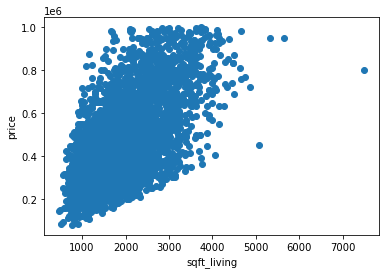

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     9181.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:08:55   Log-Likelihood:            -2.1520e+05
No. Observations:               16085   AIC:                         4.304e+05
Df Residuals:                   16083   BIC:                         4.304e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.638e+05   3412.675     48.004      

In [10]:
# modelo de regresion lineal de sqft_living con price

X = df[['sqft_living']]   
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# calcular el R2
model.score(X_test, y_test)

# calcular el MSE
y_pred = model.predict(X_test)
print(Fore.GREEN+'Error cuadrático medio: '+Fore.BLACK,mean_squared_error(y_test, y_pred))
# Coeficientes
print(Fore.GREEN+'Coeficientes: '+Fore.BLACK, model.coef_)

# Coeficiente de determinacion
print(Fore.GREEN+'Coeficientes de determinación: '+Fore.BLACK, model.score(X_test, y_test))


# Graficar
plt.scatter(X_test, y_test)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

# Resumen
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Error cuadrático medio:  26229355144.999054
Coeficientes:  [178.65037637]
Coeficientes de determinación:  0.2993440591792985


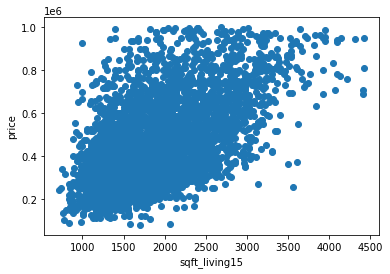

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     6961.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:08:55   Log-Likelihood:            -2.1594e+05
No. Observations:               16085   AIC:                         4.319e+05
Df Residuals:                   16083   BIC:                         4.319e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.273e+05   4290.619     29.677

In [11]:
# modelo de regresion lineal de sqft_living con price


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['sqft_living15']]   
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# calcular el R2
model.score(X_test, y_test)

# calcular el MSE
y_pred = model.predict(X_test)
print(Fore.GREEN+'Error cuadrático medio: '+Fore.BLACK,mean_squared_error(y_test, y_pred))
# Coeficientes
print(Fore.GREEN+'Coeficientes: '+Fore.BLACK, model.coef_)

# Coeficiente de determinacion
print(Fore.GREEN+'Coeficientes de determinación: '+Fore.BLACK, model.score(X_test, y_test))


# Graficar
plt.scatter(X_test, y_test)
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.show()

# Resumen
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Error cuadrático medio:  27558927414.94635
Coeficientes:  [141.72630416]
Coeficientes de determinación:  0.2638276423806699


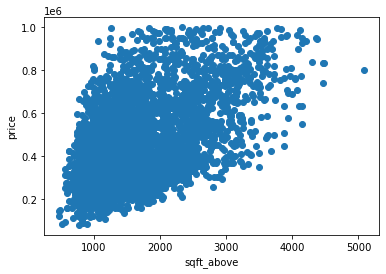

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     5830.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:08:56   Log-Likelihood:            -2.1634e+05
No. Observations:               16085   AIC:                         4.327e+05
Df Residuals:                   16083   BIC:                         4.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.29e+05   3406.745     67.232      0.0

In [12]:
# modelo de regresion lineal de sqft_above con price 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['sqft_above']]   
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# calcular el R2
model.score(X_test, y_test)

# calcular el MSE
y_pred = model.predict(X_test)
print(Fore.GREEN+'Error cuadrático medio: '+Fore.BLACK,mean_squared_error(y_test, y_pred))
# Coeficientes
print(Fore.GREEN+'Coeficientes: '+Fore.BLACK, model.coef_)

# Coeficiente de determinacion
print(Fore.GREEN+'Coeficientes de determinación: '+Fore.BLACK, model.score(X_test, y_test))


# Graficar
plt.scatter(X_test, y_test)
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

# Resumen
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

In [13]:

dd= ["sqft_living", "sqft_above",  "sqft_living15","grade"]
X = df[dd]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(Fore.GREEN+"Coeficientes:"+Fore.BLACK, model.coef_)
print('Error cuadrártico medio: %.2f'
        % mean_squared_error(y_test, y_pred))

print('Coeficiente de determinación: %.2f'
        % r2_score(y_test, y_pred))




Coeficientes: [141.72630416]
Error cuadrártico medio: 20155106989.42
Coeficiente de determinación: 0.46
